In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt

sys.path.append(os.path.join(os.getcwd(), 'EC'))
import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *

Heights dictionary: {'Ux': [26], 'Uy': [26], 'Uz': [26], 'Ts': [26], 'LI_CO2m': [26], 'LI_H2Om': [26], 'LI_Pres': [26], 'LI_diag': [26], 'diag_csat': [26]}
Plausibility limits applied
Processing large dataset (%)
Spikes removed from Ux,Uy,Uz,Ts:1488 Spikes removed from LI_H2Om:1488


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_despike_data.py:185: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'/home/engbers/Documents/PhD/Data/EC_despiked/Figures/EC_despiked_{sensor}.png', bbox_inches='tight')


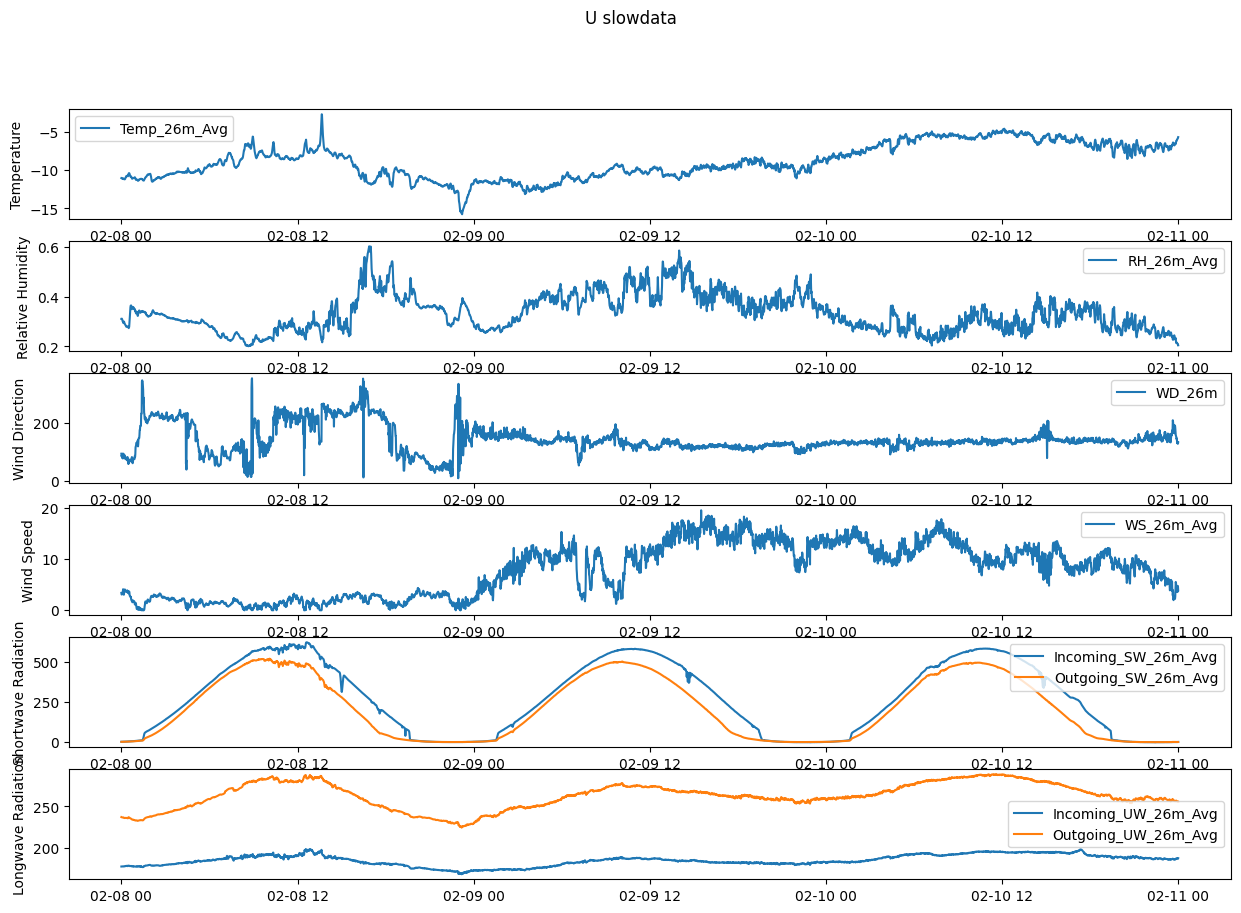

/home/engbers/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


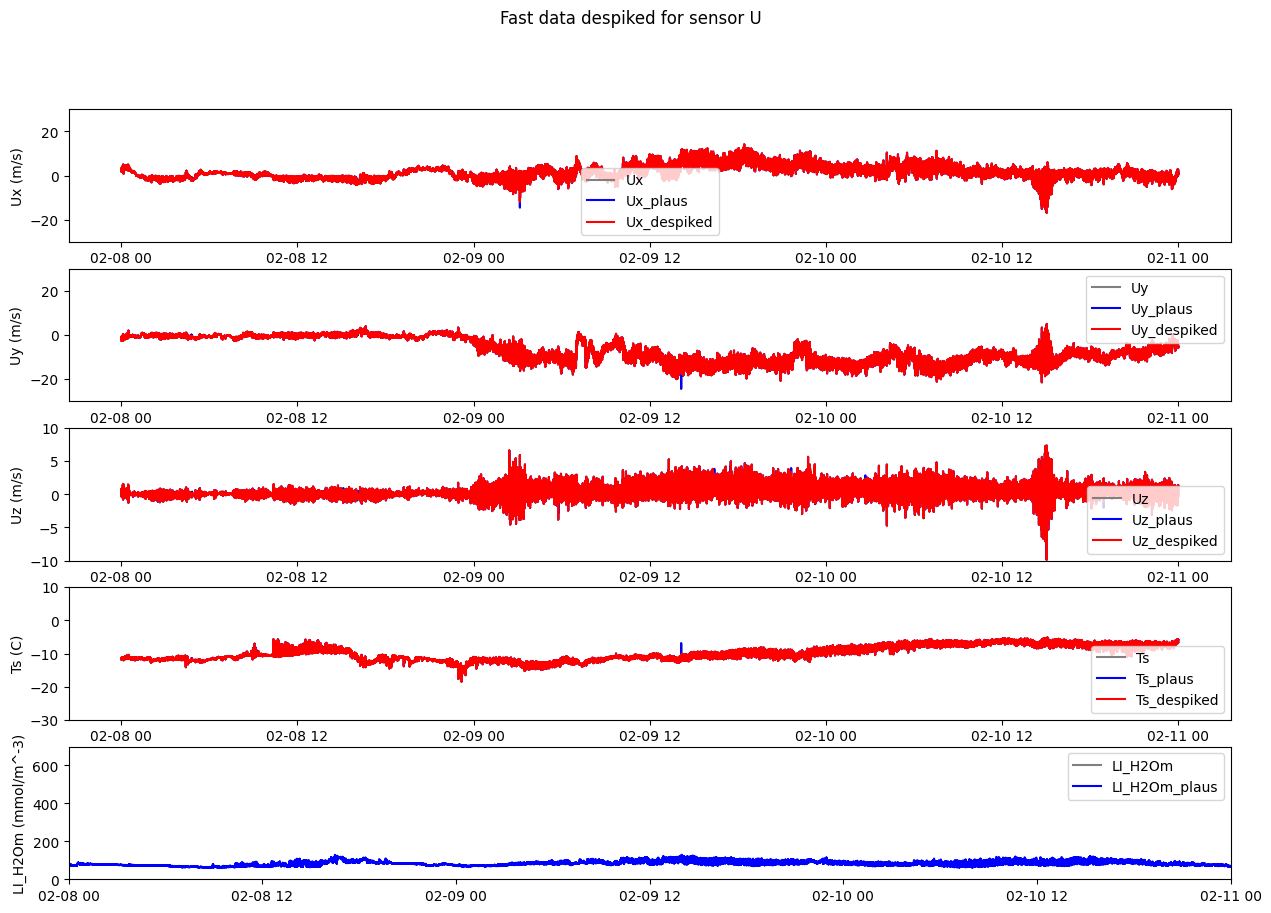

In [76]:
sensor='U'
start='2025-02-08 00:00'
end='2025-02-11 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights, folder_name = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
fastdata=read_data(folder, 'fast', sensor, start, end)

folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=True)

"""DESPIKE, PLOT, AND SAVE"""
despiked_fastdata=despike_fast_MAD(fastdata, slowdata, plim, sensor, plot_despike=True)

In [66]:
mrfd(despiked_fastdata.index, despiked_fastdata.Ux, despiked_fastdata.Uy, despiked_fastdata.Uz, despiked_fastdata.Ts, despiked_fastdata['LI_H2Om_corr'])

KeyError: 'LI_H2Om_corr'

In [145]:
fastdata_rot, angles=rotate_wind_vector(despiked_fastdata)
pd.Timedelta('50ms')
pd.Timedelta(f'{0.01}s')
# 2590525

0.1
0 days 00:30:00
18000
passed
2025-02-08 00:00:00
2025-02-08 00:29:59.900000
0 17999
                          RECORD       Ux       Uy       Uz        Ts  \
TIMESTAMP                                                               
2025-02-08 00:00:00.000  1430617  2.50475 -1.14250  0.51500 -11.68338   
2025-02-08 00:00:00.100  1430618  2.42625 -1.31500  0.67375 -11.61240   
2025-02-08 00:00:00.200  1430619  2.26275 -1.67050  0.59975 -11.64948   
2025-02-08 00:00:00.300  1430620  2.35475 -1.63900  0.43525 -11.65112   
2025-02-08 00:00:00.400  1430621  2.37150 -1.54450  0.35500 -11.66727   
...                          ...      ...      ...      ...       ...   
2025-02-08 00:29:59.500  1448612  3.68475  0.26500  0.05450 -10.73712   
2025-02-08 00:29:59.600  1448613  3.77800  0.19400  0.06800 -10.72748   
2025-02-08 00:29:59.700  1448614  3.76600  0.18075  0.12550 -10.72260   
2025-02-08 00:29:59.800  1448615  3.69550  0.09825  0.08300 -10.72748   
2025-02-08 00:29:59.900  1448616  3.

KeyError: 0

In [134]:
fastdata.index[2592600]

IndexError: index 2592600 is out of bounds for axis 0 with size 2592600

In [149]:
fastdata_rot, angles=rotate_wind_vector(despiked_fastdata)
pd.Timedelta('50ms')
pd.Timedelta(f'{0.01}s')
# 2590525

0.1
0 days 00:30:00
18000
passed
2025-02-08 00:00:00
2025-02-08 00:29:59.900000
0 17999
                          RECORD       Ux       Uy       Uz        Ts  \
TIMESTAMP                                                               
2025-02-08 00:00:00.000  1430617  2.50475 -1.14250  0.51500 -11.68338   
2025-02-08 00:00:00.100  1430618  2.42625 -1.31500  0.67375 -11.61240   
2025-02-08 00:00:00.200  1430619  2.26275 -1.67050  0.59975 -11.64948   
2025-02-08 00:00:00.300  1430620  2.35475 -1.63900  0.43525 -11.65112   
2025-02-08 00:00:00.400  1430621  2.37150 -1.54450  0.35500 -11.66727   
...                          ...      ...      ...      ...       ...   
2025-02-08 00:29:59.500  1448612  3.68475  0.26500  0.05450 -10.73712   
2025-02-08 00:29:59.600  1448613  3.77800  0.19400  0.06800 -10.72748   
2025-02-08 00:29:59.700  1448614  3.76600  0.18075  0.12550 -10.72260   
2025-02-08 00:29:59.800  1448615  3.69550  0.09825  0.08300 -10.72748   
2025-02-08 00:29:59.900  1448616  3.

Timedelta('0 days 00:00:00.010000')

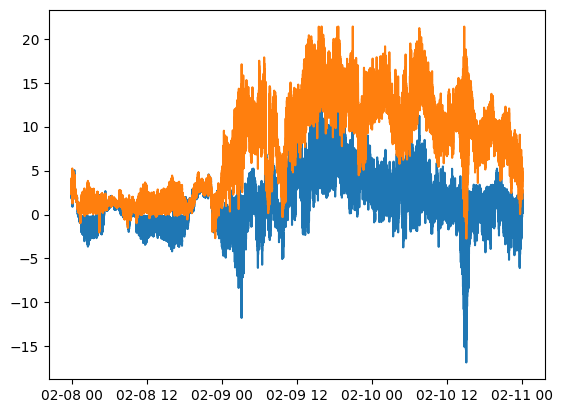

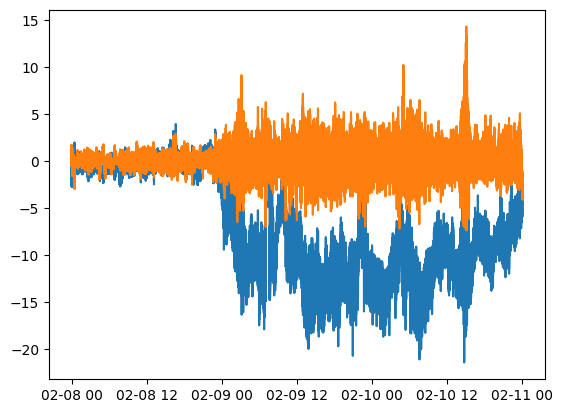

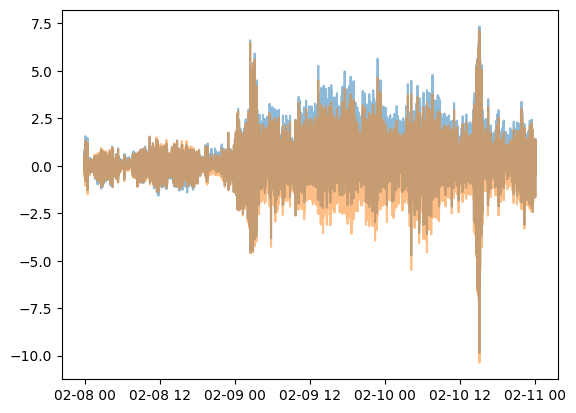

In [153]:
plt.figure()
plt.plot(despiked_fastdata['Ux'])
plt.plot(fastdata_rot['Ux'])
plt.figure()
plt.plot(despiked_fastdata['Uy'])
plt.plot(fastdata_rot['Uy'])
plt.figure()
plt.plot(despiked_fastdata['Uz'], alpha=0.5)
plt.plot(fastdata_rot['Uz'], alpha=0.5)


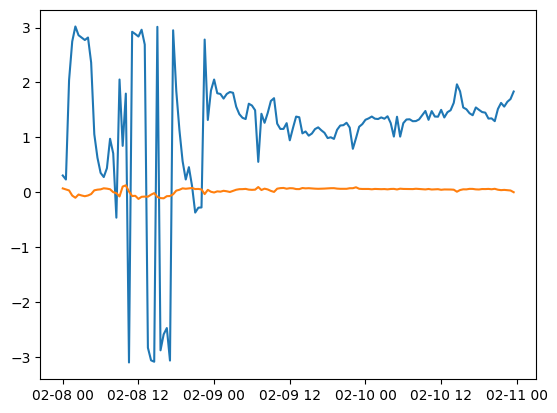

In [151]:
plt.plot(angles.theta)
plt.plot(angles.phi)

In [152]:
angles

,theta,phi
2025-02-08 00:00:00,0.307908,0.073084
2025-02-08 00:30:00,0.234788,0.054148
2025-02-08 01:00:00,2.043684,0.036046
2025-02-08 01:30:00,2.746234,-0.057375
2025-02-08 02:00:00,3.018803,-0.097030
...,...,...
2025-02-10 21:30:00,1.628421,0.041517
2025-02-10 22:00:00,1.560571,0.046013
2025-02-10 22:30:00,1.648943,0.039949
2025-02-10 23:00:00,1.699082,0.035260


In [103]:
angles

,theta,phi
2025-02-08 00:00:00.100,0.307908,0.073084
2025-02-08 00:30:00.000,0.234774,0.054138
2025-02-08 00:59:59.900,2.043372,0.036032
2025-02-08 01:29:59.800,2.746279,-0.057372
2025-02-08 01:59:59.700,3.018746,-0.097012
...,...,...
2025-02-10 21:59:46.100,1.560598,0.045903
2025-02-10 22:29:46.000,1.648231,0.040068
2025-02-10 22:59:45.900,1.699756,0.035691
2025-02-10 23:29:45.800,1.856111,0.000763


In [75]:
slowdata.columns

Index(['RECORD', 'BattV_U_Min', 'PTemp_U_Avg', 'VP_26m_Avg', 'Temp_26m_Avg',
       'RH_26m_Avg', 'AP_26m_Avg', 'WS_26m_Avg', 'WS_26m_Max', 'WS_26m_Std',
       'WD_26m', 'Incoming_SW_26m_Avg', 'Outgoing_SW_26m_Avg',
       'Incoming_UW_26m_Avg', 'Outgoing_UW_26m_Avg', 'Ux_26m_Avg',
       'Uy_26m_Avg', 'Uz_26m_Avg', 'Ts_26m_Avg', 'Ux_26m_Std',
       'LI_CO2m_26m_Avg', 'LI_H2Om_26m_Avg', 'LI_Pres_26m_Avg',
       'LI_diag_26m_Avg', 'LI_CO2m_26m_Std', 'LI_H2Om_26m_Std',
       'LI_Pres_26m_Std', 'LI_diag_26m_Std', 'wnd_dir_compass_26m',
       'wnd_dir_csat3_26m', 'wnd_spd_26m', 'rslt_wnd_spd_26m',
       'std_wnd_dir_26m', 'csat_warnings_26m', 'delT_f_Tot_26m',
       'sigl_f_Tot_26m', 'amph_f_Tot_26m', 'ampl_f_Tot_26m', 'li_chopper_26m',
       'li_detector_26m', 'li_pll_26m', 'li_sync_26m'],
      dtype='object')

In [72]:
slowdata.index[0], slowdata.index[1]

(Timestamp('2025-02-05 14:29:00'), Timestamp('2025-02-05 14:29:00'))

In [30]:
sensor='SFC'
start='2025-02-01 00:00'
end='2025-02-12 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights, folder_name = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
fastdata=read_data(folder, 'fast', sensor, start, end)

folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
slowdata=read_data(folder, 'slow', sensor, start, end)

Heights dictionary: {}


'B'

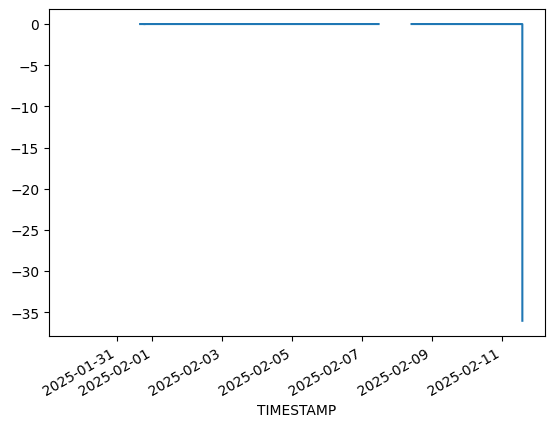

In [65]:
slowdata['RH_5m_Avg'].plot()
sensor

(<Figure size 1500x1000 with 6 Axes>,
 array([<Axes: ylabel='Temperature'>, <Axes: ylabel='Relative Humidity'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed'>,
        <Axes: ylabel='Shortwave Radiation'>,
        <Axes: ylabel='Longwave Radiation'>], dtype=object))

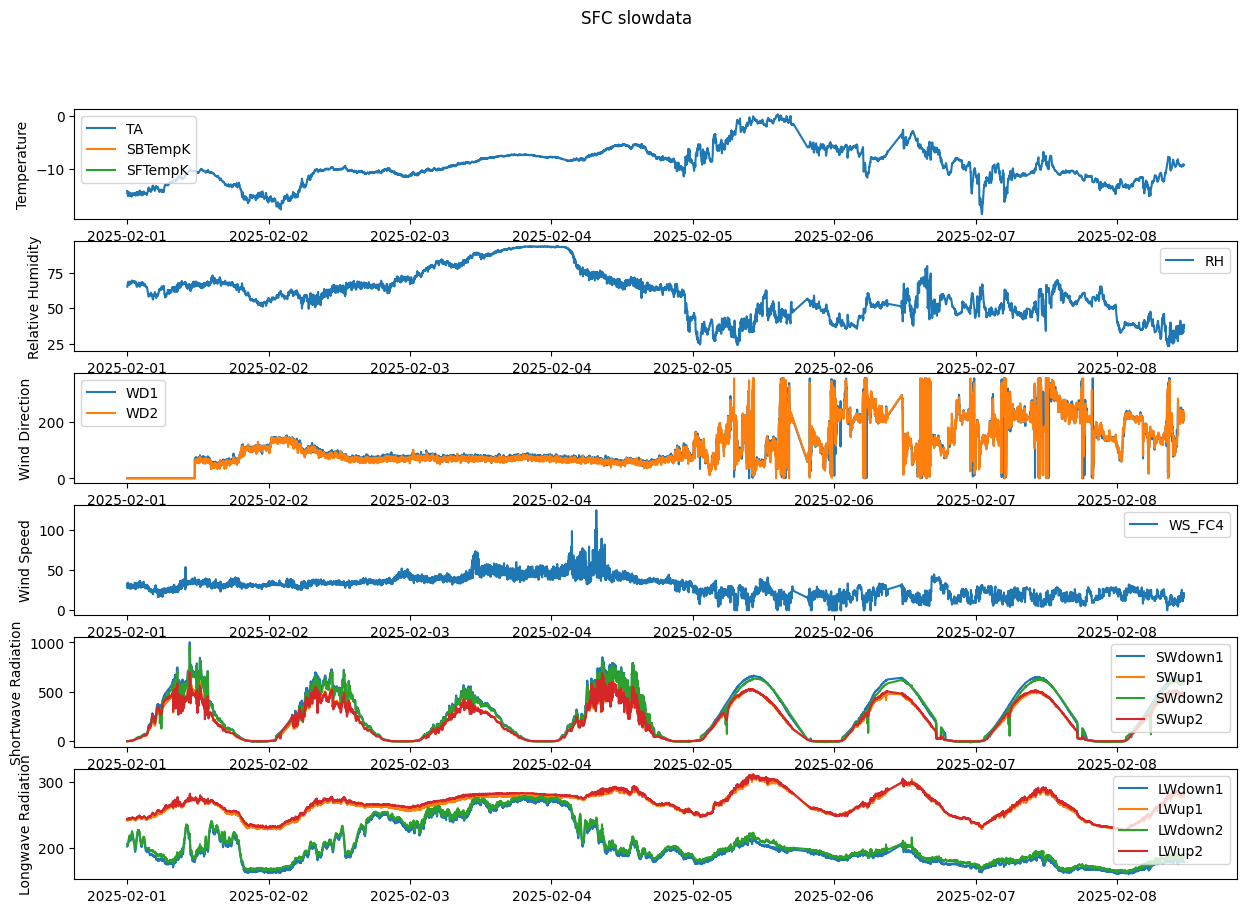

In [32]:
plot_slow_data(slowdata, sensor)

<Axes: xlabel='TIMESTAMP'>

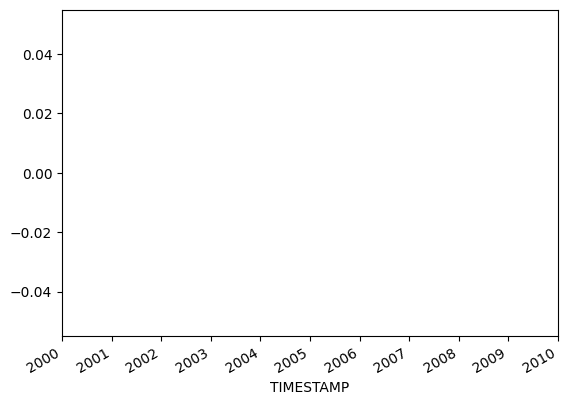

In [17]:
slowdata.columns

Index(['RECORD', 'rmcutcdate', 'rmcutctime', 'rmclatitude', 'rmclongitude',
       'BattV_Min', 'PTemp_Avg', 'PowerSPC', 'PowerLIC', 'PowerHtr', 'WD1',
       'WD2', 'TA', 'RH', 'HS_Cor', 'HS_Qty', 'SBTempK', 'SFTempK', 'SWdown1',
       'SWup1', 'LWdown1', 'LWup1', 'SWdown2', 'SWup2', 'LWdown2', 'LWup2',
       'SWdn', 'SensorT', 'PF_FC4', 'WS_FC4'],
      dtype='object')

<Axes: xlabel='TIMESTAMP'>

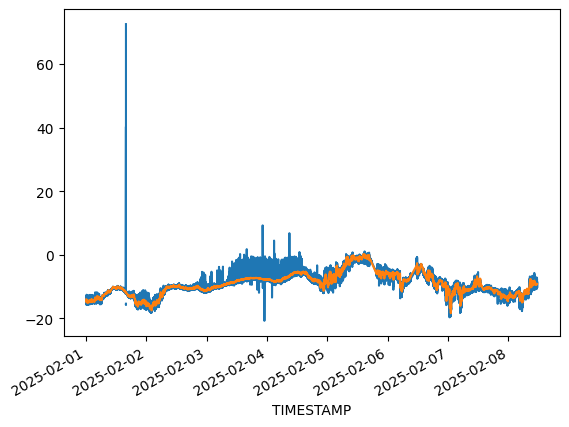

In [15]:
fastdata['Ts'].plot()
slowdata['TA'].plot()


In [37]:
fastdata

,RECORD,Ux,Uy,Uz,Ts,LI_CO2m,LI_H2Om,LI_Pres,LI_diag,diag_csat,SDM_Period,All_Fail_Tot,CSAT_sig_Tot,CSAT_NaN_Tot,IRGA_sig_Tot,IRGA_NaN_Tot,Number_Attempts,CSAT3,LI-7500
0,0,NaN,NaN,NaN,NaN,15.94878,132.07850,83.72247,247.0,61503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,15.94512,132.29700,83.72568,247.0,61503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,15.94821,132.62150,83.72247,247.0,61503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,15.95072,132.66440,83.72247,247.0,61503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,15.94981,132.73330,83.72247,247.0,61503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813341,4282172,0.48950,2.43425,-0.19000,-11.01505,15.70385,97.19016,83.02619,247.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7813342,4282173,0.43025,2.46300,-0.10100,-10.95367,15.70178,97.25504,83.02619,247.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7813343,4282174,0.42875,2.53075,-0.10650,-11.00055,15.69664,97.18711,83.02619,247.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7813344,4282175,0.39775,2.59575,-0.05975,-11.01505,15.69654,97.10783,83.02619,247.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(-10.0, 10.0)

/home/engbers/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/engbers/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


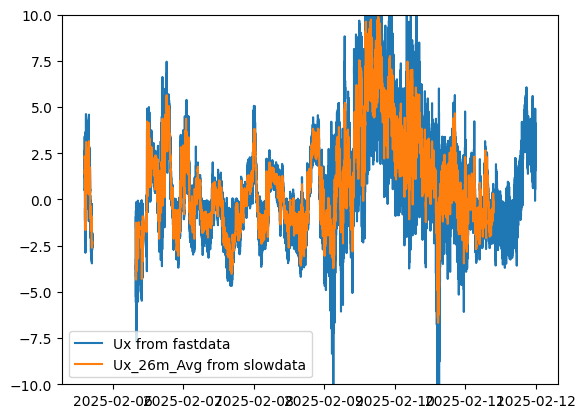

In [32]:
plt.figure()
plt.plot(fastdata['Ux'], label='Ux from fastdata')
plt.plot(slowdata['Ux_26m_Avg'], label='Ux_26m_Avg from slowdata')
plt.legend()
plt.ylim(-10,10)

In [27]:
slowdata['Ux_26m_Avg']

TIMESTAMP
2025-02-05 14:29:00    2.268637
2025-02-05 14:30:00    2.338825
2025-02-05 14:31:00    1.380261
2025-02-05 14:32:00    1.450423
2025-02-05 14:33:00    1.630606
                         ...   
2025-02-11 09:41:00   -0.657867
2025-02-11 09:42:00   -0.405296
2025-02-11 09:43:00   -0.080303
2025-02-11 09:44:00   -0.298924
2025-02-11 09:45:00   -0.234454
Name: Ux_26m_Avg, Length: 7289, dtype: float64

<Axes: xlabel='TIMESTAMP'>

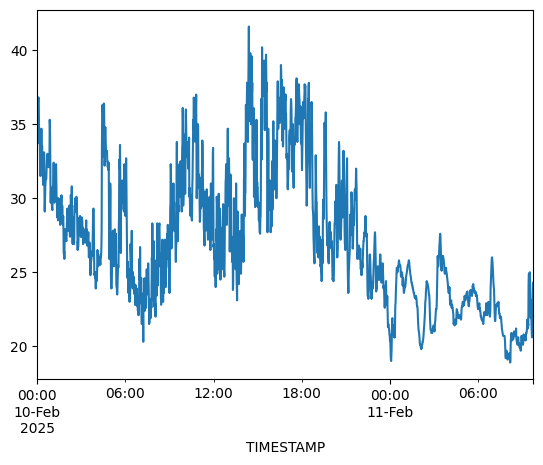

In [170]:
(slowdata['RH_26m_Avg']*100).plot()

In [ ]:
pd.to_csv

In [119]:
fastdata

,RECORD,Ux,Uy,Uz,Ts,LI_CO2m,LI_H2Om,LI_Pres,LI_diag,diag_csat
TIMESTAMP,,,,,,,,,,
2024-11-19 14:46:07.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61440
2024-11-19 14:46:07.200,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61503
2024-11-19 14:46:07.300,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61503
2024-11-19 14:46:07.500,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61503
2024-11-19 14:46:07.700,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61503
...,...,...,...,...,...,...,...,...,...,...
2025-02-11 09:45:54.100,4374162,-0.38875,-0.14850,-0.70225,-7.538757,16.50089,68.43114,82.79177,248.0,0
2025-02-11 09:45:54.200,4374163,-0.41075,-0.10675,-0.69925,-7.555054,16.42251,68.36810,82.79177,248.0,0
2025-02-11 09:45:54.300,4374164,-0.40350,-0.13025,-0.72900,-7.594055,16.38703,68.27039,82.79177,248.0,0


In [115]:
pattern=re.compile(r'_(\d+)m(_\w+)?$')
pattern.search(slowdata.columns[5])

<re.Match object; span=(2, 10), match='_26m_Avg'>

In [ ]:
fastdata.attrs['heights']

In [127]:
slowdata.columns


Index(['RECORD', 'BattV_U_Min', 'PTemp_U_Avg', 'VP_26m_Avg', 'Temp_26m_Avg',
       'RH_26m_Avg', 'AP_26m_Avg', 'WS_26m_Avg', 'WS_26m_Max', 'WS_26m_Std',
       'WD_26m', 'Incoming_SW_26m_Avg', 'Outgoing_SW_26m_Avg',
       'Incoming_UW_26m_Avg', 'Outgoing_UW_26m_Avg', 'Ux_26m_Avg',
       'Uy_26m_Avg', 'Uz_26m_Avg', 'Ts_26m_Avg', 'Ux_26m_Std',
       'LI_CO2m_26m_Avg', 'LI_H2Om_26m_Avg', 'LI_Pres_26m_Avg',
       'LI_diag_26m_Avg', 'LI_CO2m_26m_Std', 'LI_H2Om_26m_Std',
       'LI_Pres_26m_Std', 'LI_diag_26m_Std', 'wnd_dir_compass_26m',
       'wnd_dir_csat3_26m', 'wnd_spd_26m', 'rslt_wnd_spd_26m',
       'std_wnd_dir_26m', 'csat_warnings_26m', 'delT_f_Tot_26m',
       'sigl_f_Tot_26m', 'amph_f_Tot_26m', 'ampl_f_Tot_26m', 'li_chopper_26m',
       'li_detector_26m', 'li_pll_26m', 'li_sync_26m'],
      dtype='object')

In [132]:
slowdata
df_LF=pd.DataFrame()
if 'TA' not in slowdata.columns:
    height=str(fastdata.attrs['heights']['Ts'][0])
    df_LF['TA']=slowdata[f'Temp_{height}m_Avg']

In [134]:
slowdata.columns

Index(['RECORD', 'BattV_U_Min', 'PTemp_U_Avg', 'VP_26m_Avg', 'Temp_26m_Avg',
       'RH_26m_Avg', 'AP_26m_Avg', 'WS_26m_Avg', 'WS_26m_Max', 'WS_26m_Std',
       'WD_26m', 'Incoming_SW_26m_Avg', 'Outgoing_SW_26m_Avg',
       'Incoming_UW_26m_Avg', 'Outgoing_UW_26m_Avg', 'Ux_26m_Avg',
       'Uy_26m_Avg', 'Uz_26m_Avg', 'Ts_26m_Avg', 'Ux_26m_Std',
       'LI_CO2m_26m_Avg', 'LI_H2Om_26m_Avg', 'LI_Pres_26m_Avg',
       'LI_diag_26m_Avg', 'LI_CO2m_26m_Std', 'LI_H2Om_26m_Std',
       'LI_Pres_26m_Std', 'LI_diag_26m_Std', 'wnd_dir_compass_26m',
       'wnd_dir_csat3_26m', 'wnd_spd_26m', 'rslt_wnd_spd_26m',
       'std_wnd_dir_26m', 'csat_warnings_26m', 'delT_f_Tot_26m',
       'sigl_f_Tot_26m', 'amph_f_Tot_26m', 'ampl_f_Tot_26m', 'li_chopper_26m',
       'li_detector_26m', 'li_pll_26m', 'li_sync_26m'],
      dtype='object')

In [71]:
renamed_fast=rename_columns(slowdata)
renamed_fast.attrs['heights']
# slowdata.columns
renamed_fast.columns


Renaming column Temp_5m_Avg to Temp_Avg with height 5
Renaming column RH_5m_Avg to RH_Avg with height 5
Renaming column SWdn_5m to SWdn with height 5
Renaming column CS320_T_5m to CS320_T with height 5
Renaming column WS_5m_Avg to WS_Avg with height 5
Renaming column WS_5m_Max to WS_Max with height 5
Renaming column WS_5m_Std to WS_Std with height 5
Renaming column Ux_5m_Avg to Ux_Avg with height 5
Renaming column Uy_5m_Avg to Uy_Avg with height 5
Renaming column Uz_5m_Avg to Uz_Avg with height 5
Renaming column Ts_5m_Avg to Ts_Avg with height 5
Renaming column Ux_5m_Std to Ux_Std with height 5
Renaming column wnd_dir_compass_5m to wnd_dir_compass with height 5
Renaming column wnd_dir_csat3_5m to wnd_dir_csat3 with height 5
Renaming column wnd_spd_5m to wnd_spd with height 5
Renaming column rslt_wnd_spd_5m to rslt_wnd_spd with height 5
Renaming column std_wnd_dir_5m to std_wnd_dir with height 5
Renaming column csat_warnings_5m to csat_warnings with height 5
Renaming column delT_f_Tot_5

Index(['RECORD', 'BattV_B_Min', 'PTemp_B_Avg', 'Temp_Avg', 'RH_Avg', 'SBTempK',
       'SFTempK', 'SWdn', 'CS320_T', 'WS_Avg', 'WS_Max', 'WS_Std', 'Ux_Avg',
       'Uy_Avg', 'Uz_Avg', 'Ts_Avg', 'Ux_Std', 'wnd_dir_compass',
       'wnd_dir_csat3', 'wnd_spd', 'rslt_wnd_spd', 'std_wnd_dir',
       'csat_warnings', 'delT_f_Tot', 'sigl_f_Tot', 'amph_f_Tot',
       'ampl_f_Tot'],
      dtype='object')

In [75]:
renamed_fast=rename_columns(slowdata)
renamed_fast.attrs['heights']
# slowdata.columns
renamed_fast.columns


Renaming column VP_26m_Avg to VP_Avg with height 26
Renaming column Temp_26m_Avg to Temp_Avg with height 26
Renaming column RH_26m_Avg to RH_Avg with height 26
Renaming column AP_26m_Avg to AP_Avg with height 26
Renaming column WS_26m_Avg to WS_Avg with height 26
Renaming column WS_26m_Max to WS_Max with height 26
Renaming column WS_26m_Std to WS_Std with height 26
Renaming column WD_26m to WD with height 26
Renaming column Incoming_SW_26m_Avg to Incoming_SW_Avg with height 26
Renaming column Outgoing_SW_26m_Avg to Outgoing_SW_Avg with height 26
Renaming column Incoming_UW_26m_Avg to Incoming_UW_Avg with height 26
Renaming column Outgoing_UW_26m_Avg to Outgoing_UW_Avg with height 26
Renaming column Ux_26m_Avg to Ux_Avg with height 26
Renaming column Uy_26m_Avg to Uy_Avg with height 26
Renaming column Uz_26m_Avg to Uz_Avg with height 26
Renaming column Ts_26m_Avg to Ts_Avg with height 26
Renaming column Ux_26m_Std to Ux_Std with height 26
Renaming column LI_CO2m_26m_Avg to LI_CO2m_Avg w

Index(['RECORD', 'BattV_U_Min', 'PTemp_U_Avg', 'VP_Avg', 'Temp_Avg', 'RH_Avg',
       'AP_Avg', 'WS_Avg', 'WS_Max', 'WS_Std', 'WD', 'Incoming_SW_Avg',
       'Outgoing_SW_Avg', 'Incoming_UW_Avg', 'Outgoing_UW_Avg', 'Ux_Avg',
       'Uy_Avg', 'Uz_Avg', 'Ts_Avg', 'Ux_Std', 'LI_CO2m_Avg', 'LI_H2Om_Avg',
       'LI_Pres_Avg', 'LI_diag_Avg', 'LI_CO2m_Std', 'LI_H2Om_Std',
       'LI_Pres_Std', 'LI_diag_Std', 'wnd_dir_compass', 'wnd_dir_csat3',
       'wnd_spd', 'rslt_wnd_spd', 'std_wnd_dir', 'csat_warnings', 'delT_f_Tot',
       'sigl_f_Tot', 'amph_f_Tot', 'ampl_f_Tot', 'li_chopper', 'li_detector',
       'li_pll', 'li_sync'],
      dtype='object')

In [73]:
renamed_fast=rename_columns(slowdata)
renamed_fast.attrs['heights']
# slowdata.columns
renamed_fast.columns

Renaming column VP_16m_Avg to VP_Avg with height 16
Renaming column Temp_16m_Avg to Temp_Avg with height 16
Renaming column RH_16m_Avg to RH_Avg with height 16
Renaming column AP_16m_Avg to AP_Avg with height 16
Renaming column VP_10m_Avg to VP_Avg with height 10
Renaming column Temp_10m_Avg to Temp_Avg with height 10
Renaming column RH_10m_Avg to RH_Avg with height 10
Renaming column WS_16m_Avg to WS_Avg with height 16
Renaming column WS_16m_Max to WS_Max with height 16
Renaming column WS_16m_Std to WS_Std with height 16
Renaming column WD_16m to WD with height 16
Renaming column WS_10m_Avg to WS_Avg with height 10
Renaming column WS_10m_Max to WS_Max with height 10
Renaming column WS_10m_Std to WS_Std with height 10
Renaming column WD_10m to WD with height 10
Renaming column FluxMin_11m to FluxMin with height 11
Renaming column FluxMean_11m to FluxMean with height 11
Renaming column FluxMax_11m to FluxMax with height 11
Renaming column FluxStd_11m to FluxStd with height 11
Renaming c

Index(['RECORD', 'BattV_L_Min', 'PTemp_L_Avg', 'VP_Avg', 'Temp_Avg', 'RH_Avg',
       'AP_Avg', 'VP_Avg', 'Temp_Avg', 'RH_Avg', 'WS_Avg', 'WS_Max', 'WS_Std',
       'WD', 'WS_Avg', 'WS_Max', 'WS_Std', 'WD', 'FluxMin', 'FluxMean',
       'FluxMax', 'FluxStd', 'FluxSum', 'WindMin', 'WindMean', 'WindMax',
       'FC_Flux', 'FC_Wind', 'FluxMin', 'FluxMean', 'FluxMax', 'FluxStd',
       'FluxSum', 'WindMin', 'WindMean', 'WindMax', 'FC_Flux', 'FC_Wind',
       'Incoming_SW_Avg', 'Outgoing_SW_Avg', 'Incoming_LW_Avg',
       'Outgoing_LW_Avg', 'Ux_Avg', 'Uy_Avg', 'Uz_Avg', 'Ts_Avg', 'Ux_Std',
       'LI_CO2m_Avg', 'LI_H2Om_Avg', 'LI_Pres_Avg', 'LI_diag_Avg',
       'LI_CO2m_Std', 'LI_H2Om_Std', 'LI_Pres_Std', 'LI_diag_Std',
       'wnd_dir_compass', 'wnd_dir_csat3', 'wnd_spd', 'rslt_wnd_spd',
       'std_wnd_dir', 'csat_warnings', 'delT_f_Tot', 'sigl_f_Tot',
       'amph_f_Tot', 'ampl_f_Tot', 'li_chopper', 'li_detector', 'li_pll',
       'li_sync'],
      dtype='object')

In [80]:
slowdata.columns

Index(['RECORD', 'BattV_L_Min', 'PTemp_L_Avg', 'VP_16m_Avg', 'Temp_16m_Avg',
       'RH_16m_Avg', 'AP_16m_Avg', 'VP_10m_Avg', 'Temp_10m_Avg', 'RH_10m_Avg',
       'WS_16m_Avg', 'WS_16m_Max', 'WS_16m_Std', 'WD_16m', 'WS_10m_Avg',
       'WS_10m_Max', 'WS_10m_Std', 'WD_10m', 'FluxMin_11m', 'FluxMean_11m',
       'FluxMax_11m', 'FluxStd_11m', 'FluxSum_11m', 'WindMin_11m',
       'WindMean_11m', 'WindMax_11m', 'FC_Flux_11m', 'FC_Wind_11m',
       'FluxMin_4m', 'FluxMean_4m', 'FluxMax_4m', 'FluxStd_4m', 'FluxSum_4m',
       'WindMin_4m', 'WindMean_4m', 'WindMax_4m', 'FC_Flux_4m', 'FC_Wind_4m',
       'Incoming_SW_16m_Avg', 'Outgoing_SW_16m_Avg', 'Incoming_LW_16m_Avg',
       'Outgoing_LW_16m_Avg', 'Ux_16m_Avg', 'Uy_16m_Avg', 'Uz_16m_Avg',
       'Ts_16m_Avg', 'Ux_16m_Std', 'LI_CO2m_16m_Avg', 'LI_H2Om_16m_Avg',
       'LI_Pres_16m_Avg', 'LI_diag_16m_Avg', 'LI_CO2m_16m_Std',
       'LI_H2Om_16m_Std', 'LI_Pres_16m_Std', 'LI_diag_16m_Std',
       'wnd_dir_compass_16m', 'wnd_dir_csat3_16m', 'wnd

In [64]:
slowdata

,RECORD,BattV_U_Min,PTemp_U_Avg,VP_26m_Avg,Temp_26m_Avg,RH_26m_Avg,AP_26m_Avg,WS_26m_Avg,WS_26m_Max,WS_26m_Std,...,std_wnd_dir_26m,csat_warnings_26m,delT_f_Tot_26m,sigl_f_Tot_26m,amph_f_Tot_26m,ampl_f_Tot_26m,li_chopper_26m,li_detector_26m,li_pll_26m,li_sync_26m
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2025-02-05 14:29:00,0,0.00,3.753,0.000,0.000,0.000,0.0,2.249,3.332,0.812,...,0,0,0,0,0,0,0,0,0,0
2025-02-05 14:30:00,1,11.45,6.256,0.229,0.932,0.349,81.4,2.326,3.366,0.826,...,0,0,0,0,0,0,0,0,0,0
2025-02-05 14:31:00,2,11.46,6.198,0.233,1.014,0.354,82.9,1.364,3.332,0.677,...,0,0,0,0,0,0,0,0,0,0
2025-02-05 14:32:00,3,11.45,6.140,0.235,1.050,0.357,82.9,1.364,3.332,0.801,...,0,0,0,0,0,0,0,0,0,0
2025-02-05 14:33:00,4,11.44,6.076,0.235,1.068,0.356,82.9,1.721,3.332,0.714,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 09:41:00,7284,12.93,4.872,0.093,-4.366,0.211,82.8,0.668,1.683,0.817,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 09:42:00,7285,12.91,4.944,0.098,-4.581,0.225,82.8,0.503,3.332,0.794,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 09:43:00,7286,12.90,5.008,0.098,-4.948,0.230,82.8,1.501,3.332,0.620,...,0,0,0,0,0,0,0,0,0,0


In [62]:
slowdata

,RECORD,BattV_B_Min,PTemp_B_Avg,Temp_5m_Avg,RH_5m_Avg,SBTempK,SFTempK,SWdn_5m,CS320_T_5m,WS_5m_Avg,...,wnd_dir_compass_5m,wnd_dir_csat3_5m,wnd_spd_5m,rslt_wnd_spd_5m,std_wnd_dir_5m,csat_warnings_5m,delT_f_Tot_5m,sigl_f_Tot_5m,amph_f_Tot_5m,ampl_f_Tot_5m
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2025-02-11 11:51:00,0,0.00,-0.423,-33.640,-0.002,269.8,265.7,173.5,9.140,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 11:52:00,1,13.58,-0.435,-40.000,-0.003,270.0,265.7,173.3,9.390,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 11:53:00,2,13.58,-0.320,-40.000,-0.003,270.1,265.7,173.5,9.490,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 11:54:00,3,13.62,-0.184,-40.000,-0.003,270.2,265.7,172.6,9.520,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 11:55:00,4,13.59,-0.034,-40.000,-0.003,270.3,265.8,172.7,9.510,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 14:19:00,148,13.11,-1.432,NaN,NaN,269.0,263.6,NaN,6.188,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 14:20:00,149,13.10,-1.367,NaN,NaN,269.1,263.5,NaN,6.188,0.0,...,0,0,0,0,0,0,0,0,0,0
2025-02-11 14:21:00,150,12.91,-1.298,NaN,NaN,269.1,263.4,123.3,3.691,0.0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
"""READ FAST AND SLOW DATA from folder"""
fast_folder='/home/engbers/Documents/PhD/Data/EC/'
fastdata=read_data(fast_folder, 'fast', 'long')

slow_folder='/home/engbers/Documents/PhD/Data/EC/'
slowdata=read_data(slow_folder, 'slow', 'short')

slowdata.attrs['units']

{'TIMESTAMP': 'TS',
 'RECORD': 'RN',
 'rmcutcdate': nan,
 'rmcutctime': nan,
 'rmclatitude': nan,
 'rmclongitude': nan,
 'BattV_Min': 'Volts',
 'PTemp_Avg': 'degC',
 'PowerSPC': nan,
 'PowerLIC': nan,
 'PowerHtr': nan,
 'WD1': 'deg',
 'WD2': 'deg',
 'TA': 'degC',
 'RH': '%',
 'HS_Cor': 'm',
 'HS_Qty': nan,
 'SBTempK': nan,
 'SFTempK': nan,
 'SWdown1': 'W/m2',
 'SWup1': 'W/m2',
 'LWdown1': 'W/m2',
 'LWup1': 'W/m2',
 'SWdown2': 'W/m2',
 'SWup2': 'W/m2',
 'LWdown2': 'W/m2',
 'LWup2': 'W/m2',
 'SWdn': 'W/m2',
 'SensorT': 'degC',
 'PF_FC4': 'g/m2/s',
 'WS_FC4': 'km/h'}

In [13]:
despiked_fastdata=despiking(fastdata2)

Despiking...
nrspikes[0] = 65
nrspikesirg[0] = 0
nrspikestot[0] = 65
nrspikes[1] = 67
nrspikesirg[1] = 0
nrspikestot[1] = 67


In [7]:
fastdata2=fastdata.copy()

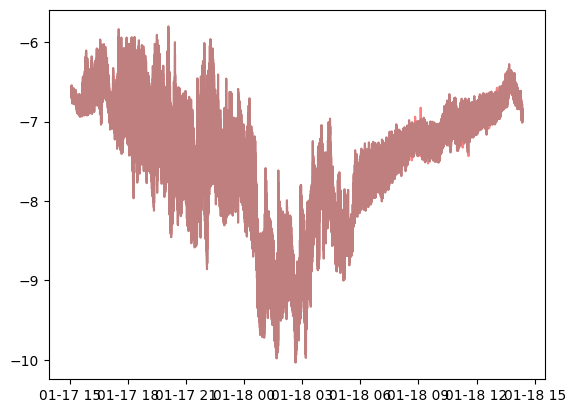

In [22]:
plt.figure() 
plt.plot(fastdata2['T'], alpha=0.5, color='red')
plt.plot(despiked_fastdata['T'], alpha=0.5, color='grey')

In [82]:
despiked_fastdata['T'].isna().sum() 

np.int64(67)